### Plots de Distribuições

Vamos discutir alguns gráficos que nos permite visualizar a distribuição de um conjunto de dados. Esses Plots são:
<br>

- distplot
- Jointplot
- pairplot
- rugplot
- kdeplot

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Esse Dataset já é por definição do seaborn
tips = sns.load_dataset("tips"); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


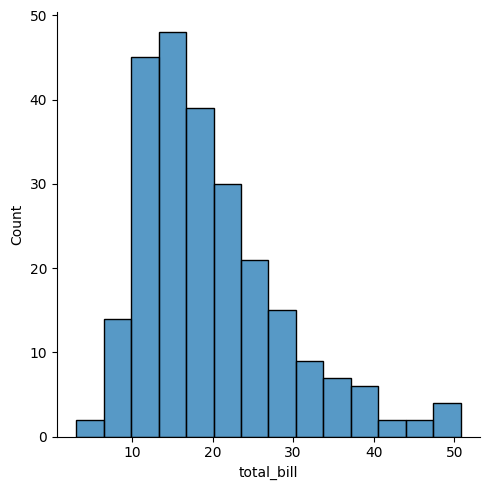

In [4]:
# kde=False, retira "acurva normal" que já vem por definição no distplot
# Não sei dizer se a curva que já vem definida se trata de uma curva normal
# bins=50, posse representar a quantidade de dados em um coluna através desse atributo
# Obs.: eu não usei distplot pq aparentemente nas novas versões do seaborn usa apenas displot
sns.displot(tips["total_bill"], kde=False)

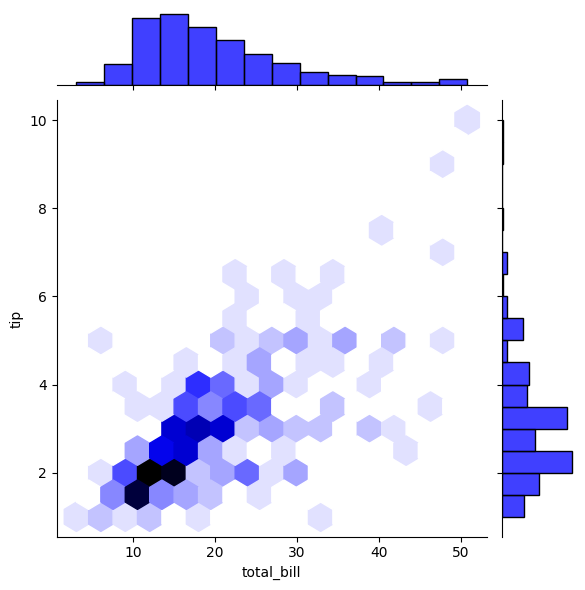

In [5]:
# Usando agora joinplots
# Para visualizar os dados em forma de pontos utilizamos o kind="reg"
# usando kid="hex" visualizamos um gráfico de calor 
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex", color="blue")

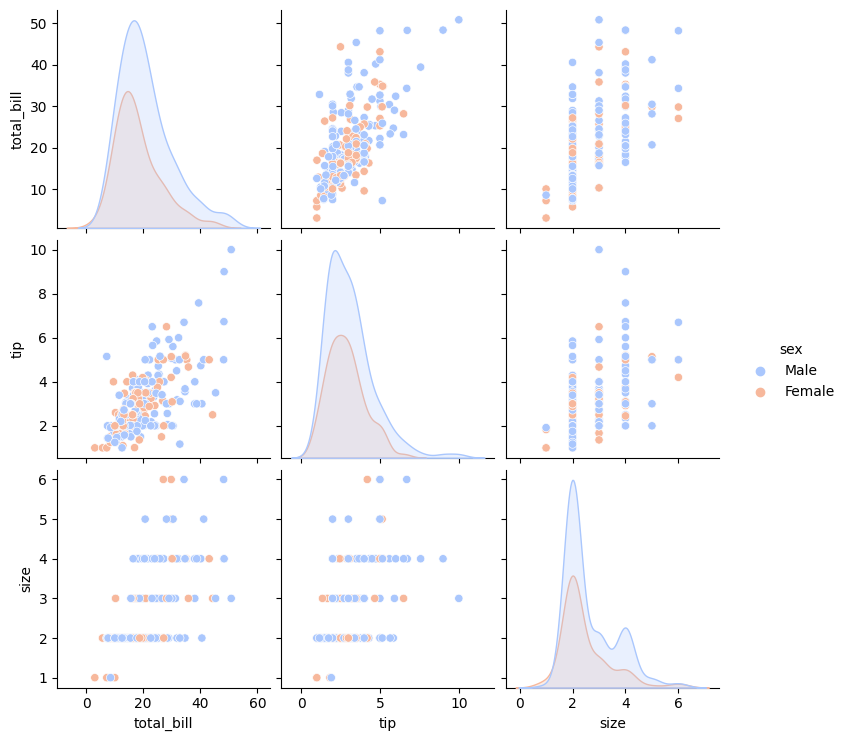

In [6]:
# Usando o pairplot(data_sets)
# Podemos fazer uma classificação dos dados usando o parametro hue="sex" queé o nome da coluna no nosso dataset
# Parametro de cores é o palette="coolwarm" 
sns.pairplot(tips, hue="sex", palette="coolwarm")

<AxesSubplot: xlabel='total_bill'>

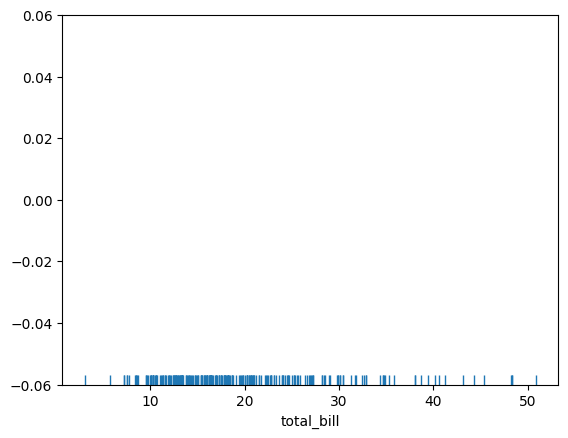

In [7]:
# Usando agora o rugplot, temos:
# Esse método se assemelha a uma ditribuição de dados
sns.rugplot(tips["total_bill"])

(0.0, 1.0)

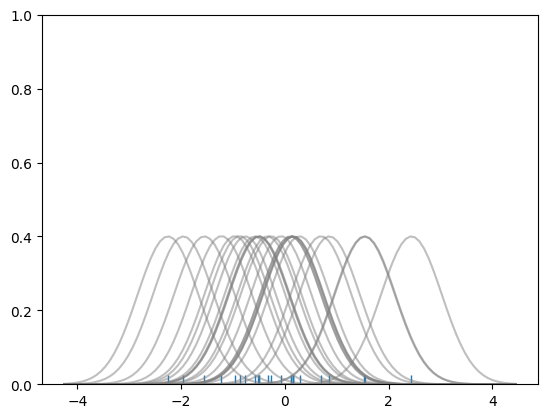

In [10]:
# Não se preocupe em entender este código
# É apenas para o diagrama abaixo

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cria o dataset
dataset = np.random.randn(25)

# Crie outro rugplot
sns.rugplot(dataset);

# Configure o eixo dos x para o gráfico
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 pontos igualmente espaçados de x_min para x_max
x_axis = np.linspace(x_min, x_max, 100)

# Configure a largura de banda. Para obter informações sobre isso:

url="http://en.wikipedia.org/wiki/kernel_density_estimation#Practical_estimation_od_the_bandwidth"

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Cria uma lista de kernel vazia
kernel_list = []

# Crie cada função de base
for data_point in dataset:
    
    # Crie um kernel para cada ponto e acrescente à lista
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    
    # Ajusta a escala para plotar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel, color="grey", alpha=0.5)

plt.ylim(0,1)

Text(0.5, 1.0, 'Sum of the Basic Functions')

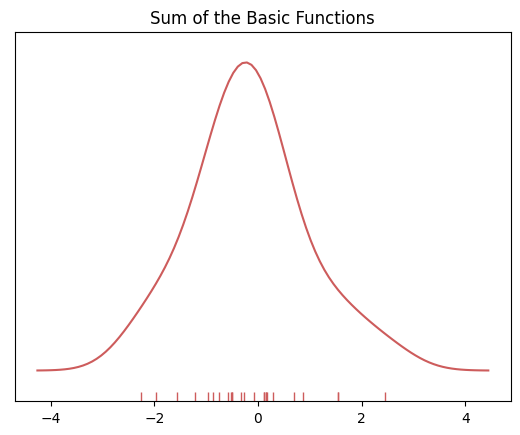

In [14]:
# Para obter o gráfico do kde podemos somar essas funções de base.

# traça a soma da função de base
sum_of_kde = np.sum(kernel_list, axis=0)

# Plota a figura
fig = plt.plot(x_axis, sum_of_kde, color="indianred")

# Adiciona o rugplot inicial
sns.rugplot(dataset, c = "indianred")

# livrar-se das marcas de "y-tick"
plt.yticks([])

# Definindo o Título
plt.title("Sum of the Basic Functions")

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

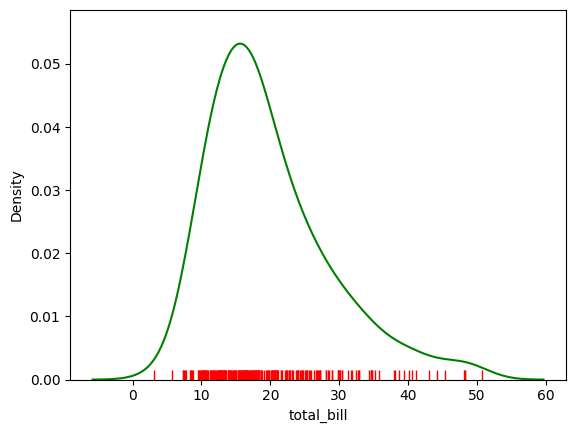

In [18]:
sns.kdeplot(tips["total_bill"], color="green")
sns.rugplot(tips["total_bill"], color="red")